# AM10IM - Introduction to Matlab

## Lecture 4 - Loops and the Collatz conjecture

ToC

### 2.1 Summary

So far we are building more and more complex programs and hopefully seeing the motivation behind them. At the moment we have thought about scripts with if statements. We are goig to talk about different types of flow-control statements in the form of loops - specifically for loops and while loops and also different types of .m files called scripts.

### 2.2 For loops

At the moment we can make decisions about fairly complex statements when it comes to if statements but one of the most useful things about computational programming is the fact that we can repeat bits of code many times. This comes very naturally in the form of 'for loops'

What if we wanted to add all the numbers up to 300? We can use a for loop

In [2]:
s = 0;
for i=1:300
    s = s+i;
end
s

s =  45150


What have we done?!

The for loop __iterates__ the code that is inside the loop until it finishes. The line 'for i=1:300' says do the following code for i=1, then i=2, then i=3 until i=300. Which is why it is intuitively called a loop. It says repeat the following code until I say stop.

Once all the code in the for loop is completed it goes back to the top of the loop and increments i by 1, so the code that is hidden and implied by the for loop is the line 'i=i+1'

But how is this sum working? Notice that each time we go back to the top of the for loop we will add 'i' to 's', and we will continue to do this all the way to 300. Let's see it in a lower sum:

In [13]:
s = 0;
for i =1:7
    s = s+i
end

s =  1
s =  3
s =  6
s =  10
s =  15
s =  21
s =  28


Did you see that it also printed every 's' value it calculated because we got rid of the semi-colon?

And if we print 'i' with it we can truly see the for loop iterating:

In [14]:
s = 0;
for i =1:7
    i
    s = s+i
end

i =  1
s =  1
i =  2
s =  3
i =  3
s =  6
i =  4
s =  10
i =  5
s =  15
i =  6
s =  21
i =  7
s =  28


Why is there 's=0' before the loop?

What if we wanted to add all the squares of the first n numbers

In [2]:
s = 0;
n = 7;
for i = 1:n %<--- notice that I didn't need to put the number explicitly here
    s = s+i.^2;
end
s

s =  140


Hopefully these are starting to make sense, if we wanted to add only the __odd__ or __even__ numbers Matlab allows the possiblity:

In [3]:
s1 = 0;
s2 = 0;
for i =1:2:n%<-- do you recognise this notation as vectors?
    i
    s1 = s1+i
end
for i = 0:2:n
    i
    s2 = s1+i
end

i =  1
s1 =  1
i =  3
s1 =  4
i =  5
s1 =  9
i =  7
s1 =  16
i = 0
s2 =  16
i =  2
s2 =  18
i =  4
s2 =  20
i =  6
s2 =  22


Notice that I didn't need to state i=0 again when I started another for loop it was just happy to start from i=0.

What if there wasn't a pattern to the numbers that I wanted the for loop to iterate? It works just as well:

In [26]:
for i = [1 14 23 6 12]
    s = s+i;
end
s

s =  124


The notation is generally

In [ ]:
for i = % a vector
    % code
end

Of course there is no rule on what you call the vector, call it whatever you please, I simply use 'i' as it is convention, you pick whatever is convenient.

Let's do something more complicated. Using Problem 1 from Project Euler:

__Problem 1__ (Project Euler):

If we list all the natural numbers below 10 that are multiples of 3 or 5, we get 3, 5, 6 and 9. The sum of these multiples is 23.

Find the sum of all the multiples of 3 or 5 below 1000.


Clearly we need a for loop running over all the integers below 1000. We also need to check if that integer is a multiple of three or a multiple of 5, which implies if statements:

In [4]:
s = 0;
for i = 1:1000
    if mod(i,3)==0
        s = s+i;
    end
    if mod(i,5)==0
        s = s+i;
    end
end
s

s =  267333


Easy! But actually the answer is 233168. What have we done wrong? Can you see what we have missed? We will discuss at a later point tips in debugging code but for now what should the answer be if we replace 1000 with 20? You can do this by hand and then compare it to the solution from the code.

For loops do not just exist for summation, it can be used in any case we wish to repeat an action. Consider the following:

__Problem 2__ : Can we simulate a dice roll of two 6 sided dice. If we do it many times can we approximate the probability of each sum?

A dice roll is generally thought to be random, so we need to be able to generate (pseudo)random numbers. Thankfully matlab has a function for that as 'rand' which generates a random number between 0 and 1.

In [25]:
rand % a random number between 0 and 1

ans =  0.85421


In [12]:
d1 = ceil(6*rand) % using the ceil function (rounds up) we get an equally weighted dice roll.
d2 = ceil(6*rand)
s = d1+d2

d1 =  1
d2 =  1
s =  2


But if we wanted to perform it many times and find the probability distribution we have to think about the cumulative result of s.

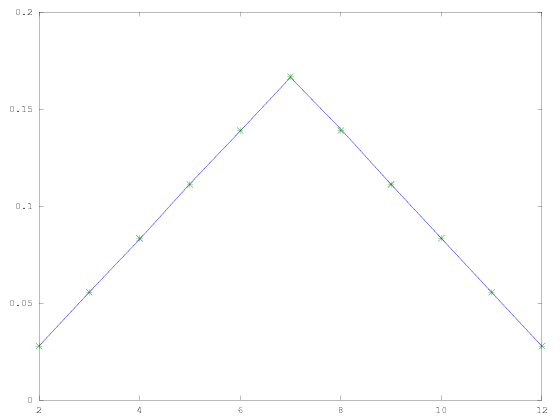

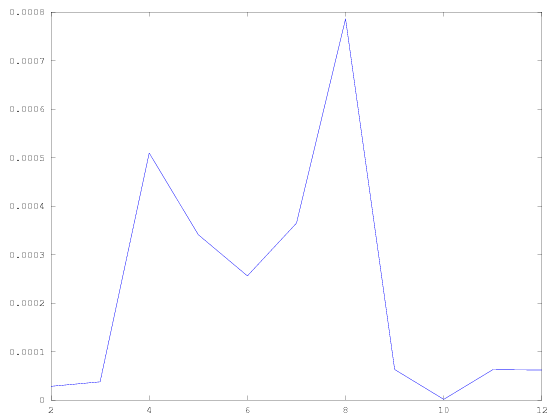

In [19]:
clear all
n = 1000000;                  % n dice rolls
r = zeros(11,1);             % creates an 11x1 vector of zeros. This will +1 to an element for each dice roll
for i=1:n
    d1 = ceil(6*rand);       %first dice roll
    d2 = ceil(6*rand);       %second dice roll
    s=d1+d2;                 %sum
    r(s-1) = r(s-1)+1;       %add one to the correct index in r.
end
r = r./n;                    %normalisation constant
a = 1./36:1./36:6./36;       %this line and the next two lines generates the ACTUAL probability
b = 5./36:-1./36:1./36;
aa = [a b]'; 
plot([2:12],abs(r-aa))       %plots absolute difference between the numeric and the analytic.(on a seperate plot)
figure
plot([2:12],r,[2:12],aa,'*') %Plot the numeric probability and the analytic probability

### 2.3 While loops

What if we want to repeat something but we're not sure how long it will take but we do have certain conditions that must be met. For example we wanted to continue the above until the error for each result is less than 0.05? We could try to guess how many iterations we'd need but that's inaccurate and inefficent. What we can use instead is a while loop:

In [ ]:
while %logical expression
%Perform code
end

Which performs the code inside the loop __while__ the logical expression is true. If we wanted to sum the first 100 integers:

In [4]:
s = 0;
i = 0;
while i<=100
    s = s+i;
    i = i+1;
end
s

s =  5050


Which looks incredibly similar to the for loop. But instead of specifying i, we are giving a condition that must hold. Notice the difference that we have to increment 'i' manually, the while loop doesn't do it for us like the for loop in fact if we wrote something like this:

In [5]:
s = 0;
i = 0;
while i<=100
    s = s+i;
end
s

It would never end because we haven't iterated i and so it will always be less than 100. This is something you have to be aware of when using while loops, that at some point the logical expression will be false. Let's keep exploring while loops with an example.

### 2.4 The Collatz Conjecture.

Pick any positive integer. If it is even divide it by two. If it is odd, triple it and add 1. Repeat with the new number. Keep going until you finally reach 1. How many iterations do you need to do before it reaches 1? What's the highest number that will be reached? This is ideal for a while loop.

In [39]:
z = 25  % starting number
i = 0;    % initialising the count
while (z ~= 1)           % Perform the following code while z =/= 1
    if (mod(z,2)==0)     % If z is an even number
        z = z./2           % divide it by two
    else                 % Otherwise
        z = 3.*z+1       % triple it and add 1
    end
i=i+1;                  % every time we we go through the while loop we have performed an iteration,
end                     % so add one to the count.
i                       % at the end of the while loop show how many iterations have been performed.

z =  25
z =  76
z =  38
z =  19
z =  58
z =  29
z =  88
z =  44
z =  22
z =  11
z =  34
z =  17
z =  52
z =  26
z =  13
z =  40
z =  20
z =  10
z =  5
z =  16
z =  8
z =  4
z =  2
z =  1
i =  23


And we can pick any number we'd like for z! Notice also that I have embedded an if statement inside a while loop. This perfectly fine.

However, this bit of code is a bit crude and maybe we'd like to compare stopping times for each integer. In this case we will need to run over the integers and for each integer perform the above bit of code. This sounds like we should be using for loops!

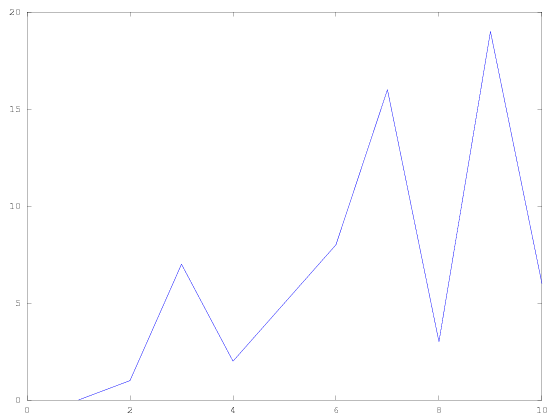

In [35]:
clear all
n = 10;       % comparing the first n integers.
t = [];         % We will be storing the stopping time as a vector t, this notation means it's currently a 0x0 array
for j = 1:n
    z = j;          %Above we input z. Now we are going to run it over every positive integer  
    i = 0;          %i is going to be counting how many steps it takes which we need to reset for every integer
    while(z ~= 1)   %which is why i=0 is inside the for loop
        if (mod(z,2)==0)     
            z = z./2;         
        else                 % Code from above 
            z = 3.*z+1;       
        end
    i = i+1;
    end
    t = [t i];               % here this will store the count in t. t will be a vector that becomes size nx1
%{
Equally could have written at the top instead of t=[]: t = zeros(n,1)
then HERE
t(j)=i
This would have got to the same answer.
%}    
end
plot(t)

This is only being about 10 lines of code long and we can check the stopping time for __lots__ of numbers. Look through this code and make sure it makes sense because every line is doing something. The way to understand code, particularly loops and other control statements is to write out the first few iterations by hand.

Notice that at the moment every number has so far eventually reached 1. The Collatz conjecture (currently unproven) is that __every__ positive integer will reach 1. All numbers up to 5764000000000000000 have been shown to follow this conjecture but no proof exists.

One last thing of note is that while loops check the condition at the top of the loop as opposed to the bottom. Every time it goes back to the top it checks the condition. This is important as you may accidently do one extra loop than you intended. Also with while loops you must make sure that your logical expressions can end.